In [298]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [299]:
# Load the dataset from an Excel file
df = pd.read_excel('nutrient-file-release2-jan22.xlsx', sheet_name=1)

In [300]:
# Remove columns with missing values
df = df[df.columns[~df.isnull().any()]]

In [301]:
# Define the target variable
predict = 'Protein \n(g)'

# Split the data into features (X) and target (y), y will be protein
X = df.loc[:, df.columns != predict]
y = df[predict]


In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [303]:
# Find nutrients that correlated to protein
correlation_cutoff = 0.3
correlations = X_train.corrwith(y_train, numeric_only=True)
correlations = correlations.sort_values()
correlations = correlations.dropna()
correlations = correlations[abs(correlations) >= correlation_cutoff]

In [304]:
correlations

Available carbohydrate, with sugar alcohols \n(g)      -0.311739
Available carbohydrate, without sugar alcohols \n(g)   -0.309989
Total sugars (g)                                       -0.307079
Vitamin D3 equivalents \n(ug)                           0.324242
C22:5w3 (mg)                                            0.340197
Cholesterol \n(mg)                                      0.407516
25-hydroxy cholecalciferol (25-OH D3) \n(ug)            0.424564
Niacin (B3) \n(mg)                                      0.441776
Zinc (Zn) \n(mg)                                        0.633874
Niacin derived equivalents \n(mg)                       0.656785
Phosphorus (P) \n(mg)                                   0.675856
Niacin derived from tryptophan \n(mg)                   0.913233
Tryptophan \n(mg)                                       0.913233
Nitrogen \n(g)                                          0.998240
dtype: float64

In [305]:
df[correlations.index].corr()

,"Available carbohydrate, with sugar alcohols \n(g)","Available carbohydrate, without sugar alcohols \n(g)",Total sugars (g),Vitamin D3 equivalents \n(ug),C22:5w3 (mg),Cholesterol \n(mg),25-hydroxy cholecalciferol (25-OH D3) \n(ug),Niacin (B3) \n(mg),Zinc (Zn) \n(mg),Niacin derived equivalents \n(mg),Phosphorus (P) \n(mg),Niacin derived from tryptophan \n(mg),Tryptophan \n(mg),Nitrogen \n(g)
"Available carbohydrate, with sugar alcohols \n(g)",1.000000,0.999318,0.609591,-0.295020,-0.225009,-0.281336,-0.294368,-0.135697,-0.189671,-0.198705,-0.020033,-0.258502,-0.258488,-0.290147
"Available carbohydrate, without sugar alcohols \n(g)",0.999318,1.000000,0.608495,-0.295384,-0.224090,-0.279942,-0.293165,-0.134496,-0.188416,-0.197006,-0.018507,-0.256279,-0.256263,-0.287872
Total sugars (g),0.609591,0.608495,1.000000,-0.183722,-0.149049,-0.164552,-0.195251,-0.154458,-0.199964,-0.220934,-0.132749,-0.286034,-0.286029,-0.297096
Vitamin D3 equivalents \n(ug),-0.295020,-0.295384,-0.183722,1.000000,0.242781,0.455956,0.666505,0.204726,0.176761,0.290377,0.203175,0.356684,0.356705,0.342352
C22:5w3 (mg),-0.225009,-0.224090,-0.149049,0.242781,1.000000,0.239081,0.129145,0.140602,0.199745,0.222915,0.238489,0.317164,0.317272,0.352767
Cholesterol \n(mg),-0.281336,-0.279942,-0.164552,0.455956,0.239081,1.000000,0.524117,0.149038,0.266734,0.267242,0.315521,0.430469,0.430414,0.419729
25-hydroxy cholecalciferol (25-OH D3) \n(ug),-0.294368,-0.293165,-0.195251,0.666505,0.129145,0.524117,1.000000,0.234086,0.318650,0.339701,0.203486,0.428120,0.428130,0.440304
Niacin (B3) \n(mg),-0.135697,-0.134496,-0.154458,0.204726,0.140602,0.149038,0.234086,1.000000,0.294267,0.951939,0.448399,0.459031,0.459070,0.442464
Zinc (Zn) \n(mg),-0.189671,-0.188416,-0.199964,0.176761,0.199745,0.266734,0.318650,0.294267,1.000000,0.433214,0.544439,0.574989,0.575067,0.653670
Niacin derived equivalents \n(mg),-0.198705,-0.197006,-0.220934,0.290377,0.222915,0.267242,0.339701,0.951939,0.433214,1.000000,0.600869,0.705635,0.705664,0.667764


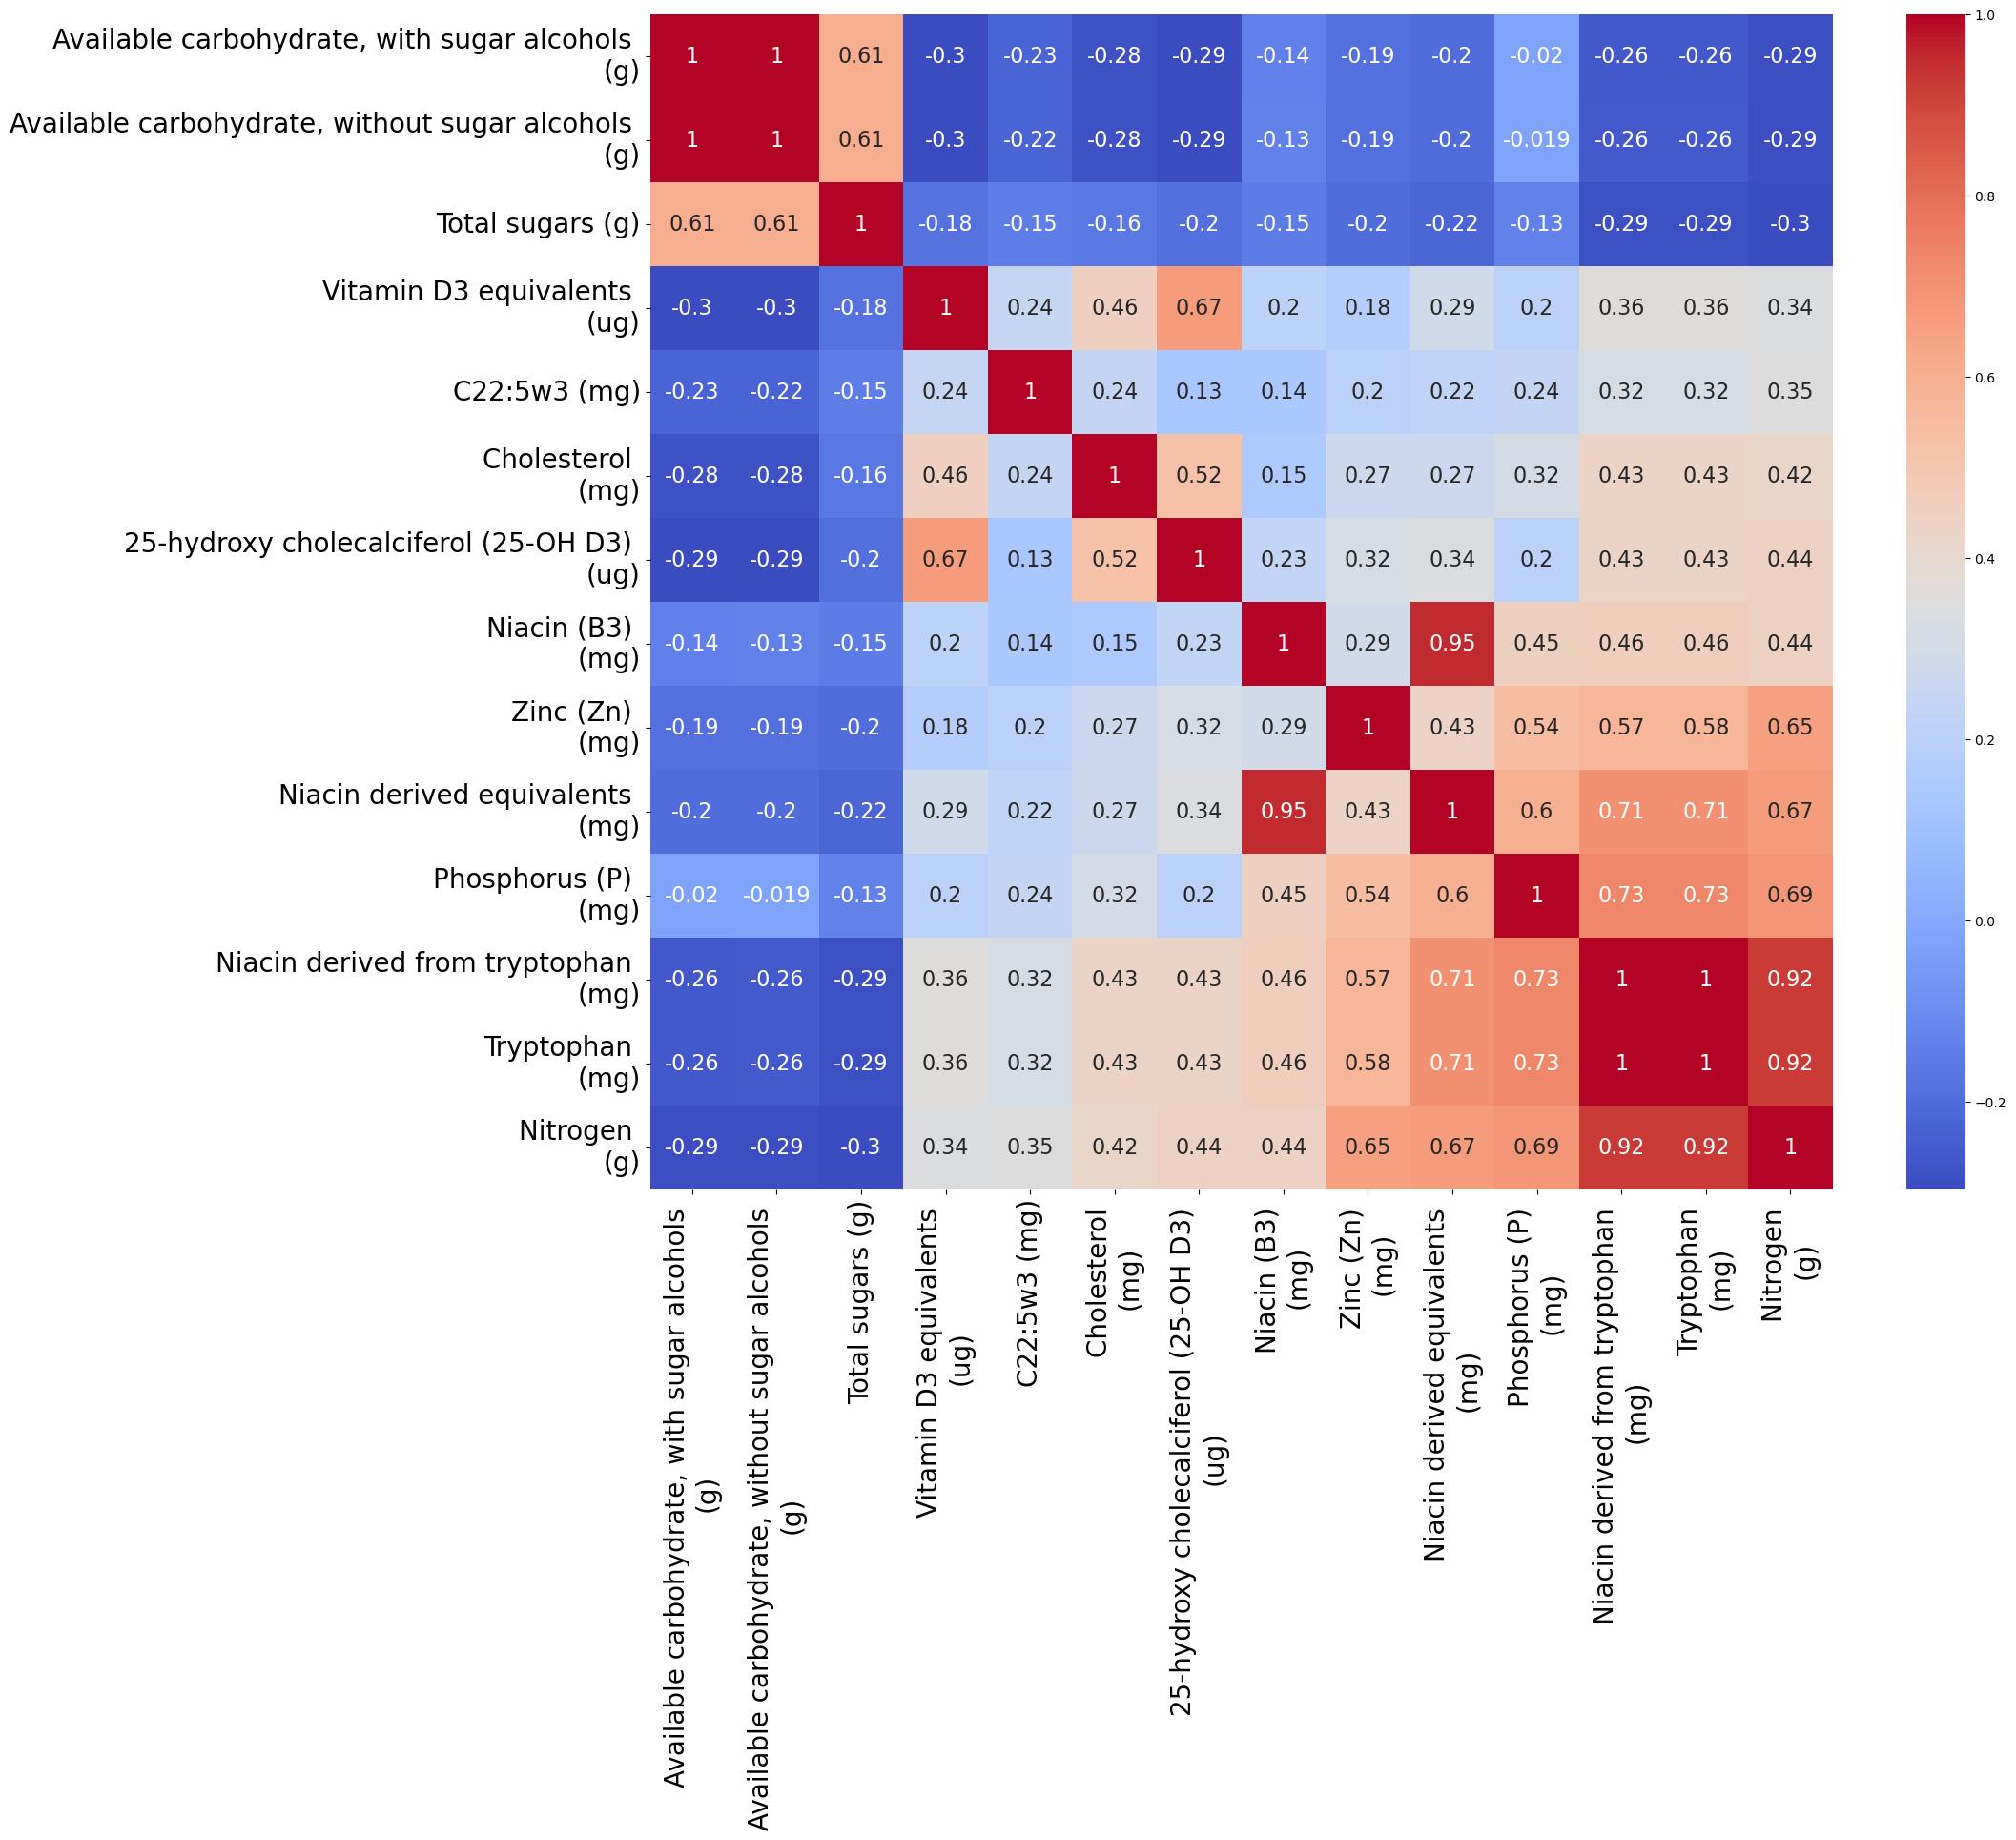

In [306]:
# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(df[correlations.index].corr(), cmap='coolwarm', ax=ax, annot=True, annot_kws={"fontsize": 16})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()

In [307]:
# Remove redundant nutrients using variance inflation factor (VIF)
vif_cutoff = 10
X_train = X_train[correlations.index]
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
mask = [v <= vif_cutoff for v in vif]
X_train = X_train.loc[:, mask]

In [308]:
vif

[3193.69694554369,
 3185.9549535588467,
 2.0006075444663494,
 2.3630150396266254,
 1.366654659369165,
 2.086135826978604,
 2.8173226950062906,
 493.414102049965,
 3.023319880878934,
 971.0610695168245,
 6.241521127443208,
 283190.90575510653,
 283210.7659990532,
 16.06390513960722]

In [309]:
vifdata = list(zip(list(correlations.keys()),vif))

In [310]:
vifdata

[('Available carbohydrate, with sugar alcohols \n(g)', 3193.69694554369),
 ('Available carbohydrate, without sugar alcohols \n(g)', 3185.9549535588467),
 ('Total sugars (g)', 2.0006075444663494),
 ('Vitamin D3 equivalents \n(ug)', 2.3630150396266254),
 ('C22:5w3 (mg)', 1.366654659369165),
 ('Cholesterol \n(mg)', 2.086135826978604),
 ('25-hydroxy cholecalciferol (25-OH D3) \n(ug)', 2.8173226950062906),
 ('Niacin (B3) \n(mg)', 493.414102049965),
 ('Zinc (Zn) \n(mg)', 3.023319880878934),
 ('Niacin derived equivalents \n(mg)', 971.0610695168245),
 ('Phosphorus (P) \n(mg)', 6.241521127443208),
 ('Niacin derived from tryptophan \n(mg)', 283190.90575510653),
 ('Tryptophan \n(mg)', 283210.7659990532),
 ('Nitrogen \n(g)', 16.06390513960722)]

In [311]:
X_train.columns

Index(['Total sugars (g)', 'Vitamin D3 equivalents \n(ug)', 'C22:5w3 (mg)',
       'Cholesterol \n(mg)', '25-hydroxy cholecalciferol (25-OH D3) \n(ug)',
       'Zinc (Zn) \n(mg)', 'Phosphorus (P) \n(mg)'],
      dtype='object')

In [312]:
# Create a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [313]:
# Print the model equation
intercept = lm.intercept_
coefficients = lm.coef_
# print('Intercept', intercept)
# print('Coefficients', coefficients)

# Create a list of strings representing the terms of the linear regression function
terms = [f"{intercept:.6f}"] + [f"{coef:.6f}*x_{i+1}" for i, coef in enumerate(coefficients)]
linear_reg_func = " + ".join(terms)

print("Linear regression function:")
print(linear_reg_func)

Linear regression function:
3.470379 + -0.104328*x_1 + -0.038480*x_2 + 0.029229*x_3 + 0.008660*x_4 + 7.719539*x_5 + 1.486171*x_6 + 0.032061*x_7


In [314]:
# Evaluate the model on the testing set
X_test = X_test[X_train.columns]
y_pred = lm.predict(X_test)
y_pred_train = lm.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
print('MSE for the testing dataset', mse)
print('RMSE for the testing dataset', np.sqrt(mse))
r_squared_train = r2_score(y_train, y_pred_train)
print("Training R-squared score:", r_squared_train)
r_squared_test = r2_score(y_test, y_pred)
print("Testing R-squared score:", r_squared_test)

MSE for the testing dataset 33.61940987237669
RMSE for the testing dataset 5.7982247173058665
Training R-squared score: 0.6600039714004209
Testing R-squared score: 0.7446987361331401


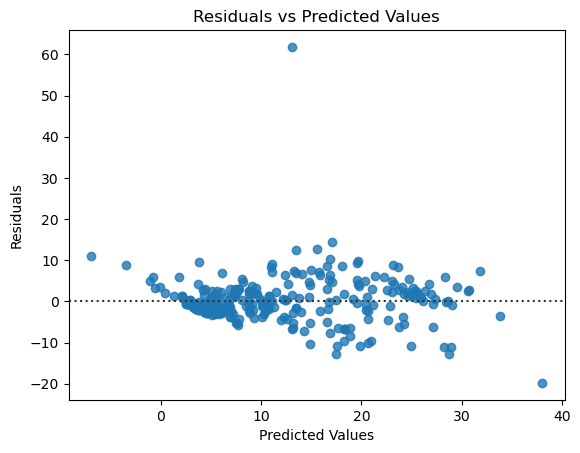

In [315]:
# Visualize residuals
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

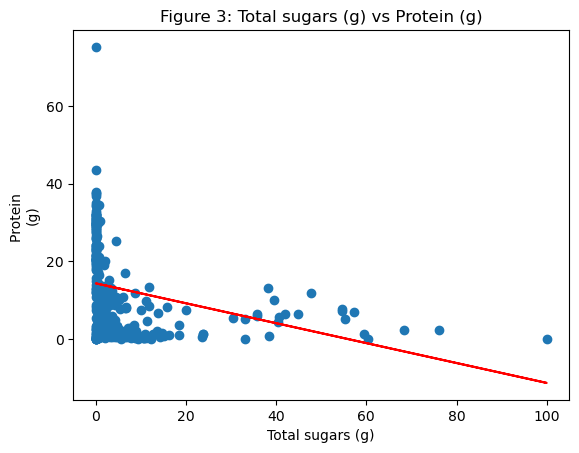

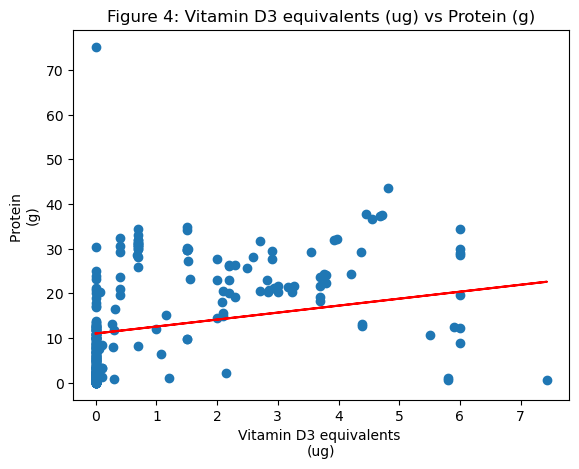

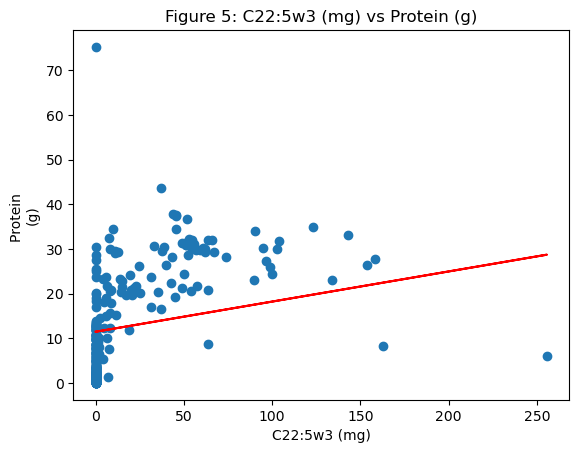

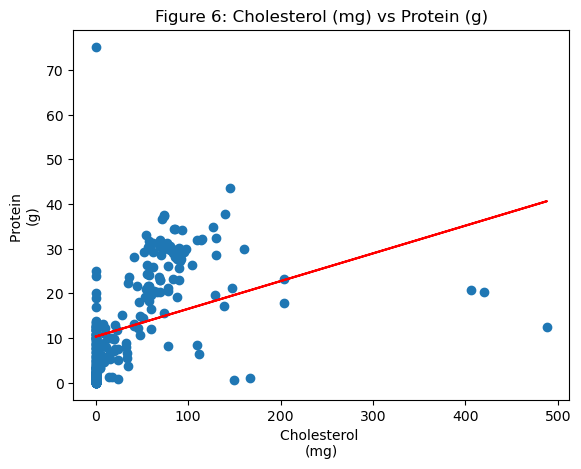

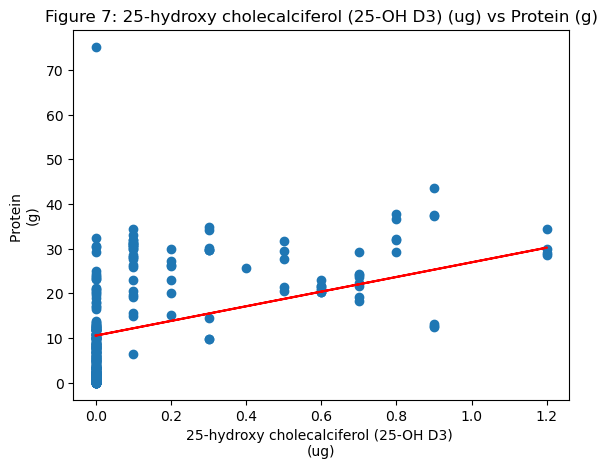

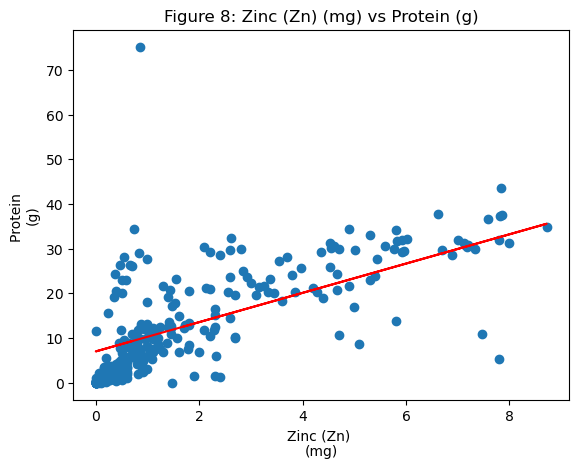

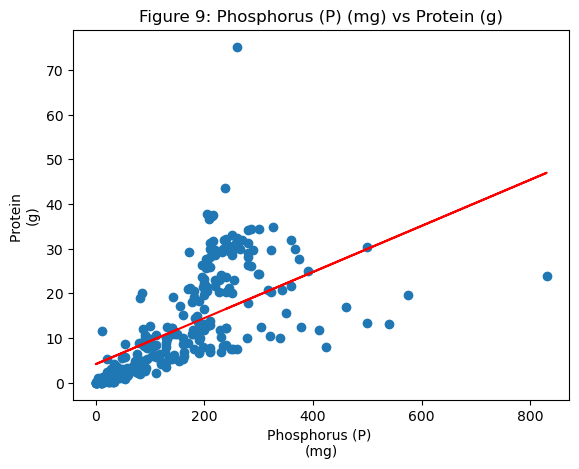

In [316]:
# Plot individual features against the target variable
i = 3
for feature in X_train.columns:
    X_train_mr = X_train[feature].values.reshape(-1, 1)
    X_test_mr = X_test[feature].values.reshape(-1, 1)
    lm_mr = LinearRegression().fit(X_train_mr, y_train) 
    y_pred_mr = lm_mr.predict(X_test_mr)
    # Plot the scatter plot and the line of regression
    plt.scatter(X_test_mr, y_test)
    plt.plot(X_test_mr, y_pred_mr, color='red')
    plt.title(f"Figure {i}: " + feature.replace('\n', '') + " vs " + predict.replace('\n', ''))
    plt.xlabel(feature)
    plt.ylabel(predict)
    plt.show()
    i += 1

In [317]:
# cross validation
n = 10
kf = KFold(n_splits=n, shuffle=True, random_state=69)
mse_scores = []
r2_scores = []
X = X[X_train.columns]
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average RMSE: {np.sqrt(np.mean(mse_scores))}")
print(f"Average R2: {np.mean(r2_scores)}")

Average MSE: 42.20417238177055
Average RMSE: 6.4964738421524135
Average R2: 0.6683947956726739
